In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
results = pd.read_json('results_v2.json', orient='records')
results.sixHz_accuracy = results.sixHz_accuracy.apply(np.mean)
results.sevenHz_accuracy = results.sevenHz_accuracy.apply(np.mean)
results.null_accuracy = results.null_accuracy.apply(np.mean)
results = results.round(2)
results

,windowTime,percentile,freqInterval,sixHz_accuracy,sevenHz_accuracy,null_accuracy
0,1,10,0.1,0.43,0.00,1.00
1,1,10,0.2,0.43,0.00,1.00
2,1,10,0.3,0.44,0.01,1.00
3,1,10,0.4,0.44,0.01,1.00
4,1,10,0.5,0.44,0.37,0.88
...,...,...,...,...,...,...
220,5,90,0.1,0.83,1.00,0.83
221,5,90,0.2,0.86,1.00,0.71
222,5,90,0.3,0.94,1.00,0.74
223,5,90,0.4,0.94,1.00,0.66


In [5]:
results = results.melt(id_vars=['windowTime','percentile', 'freqInterval'], var_name = 'frequency', value_name='accuracy')
results

,windowTime,percentile,freqInterval,frequency,accuracy
0,1,10,0.1,sixHz_accuracy,0.43
1,1,10,0.2,sixHz_accuracy,0.43
2,1,10,0.3,sixHz_accuracy,0.44
3,1,10,0.4,sixHz_accuracy,0.44
4,1,10,0.5,sixHz_accuracy,0.44
...,...,...,...,...,...
670,5,90,0.1,null_accuracy,0.83
671,5,90,0.2,null_accuracy,0.71
672,5,90,0.3,null_accuracy,0.74
673,5,90,0.4,null_accuracy,0.66


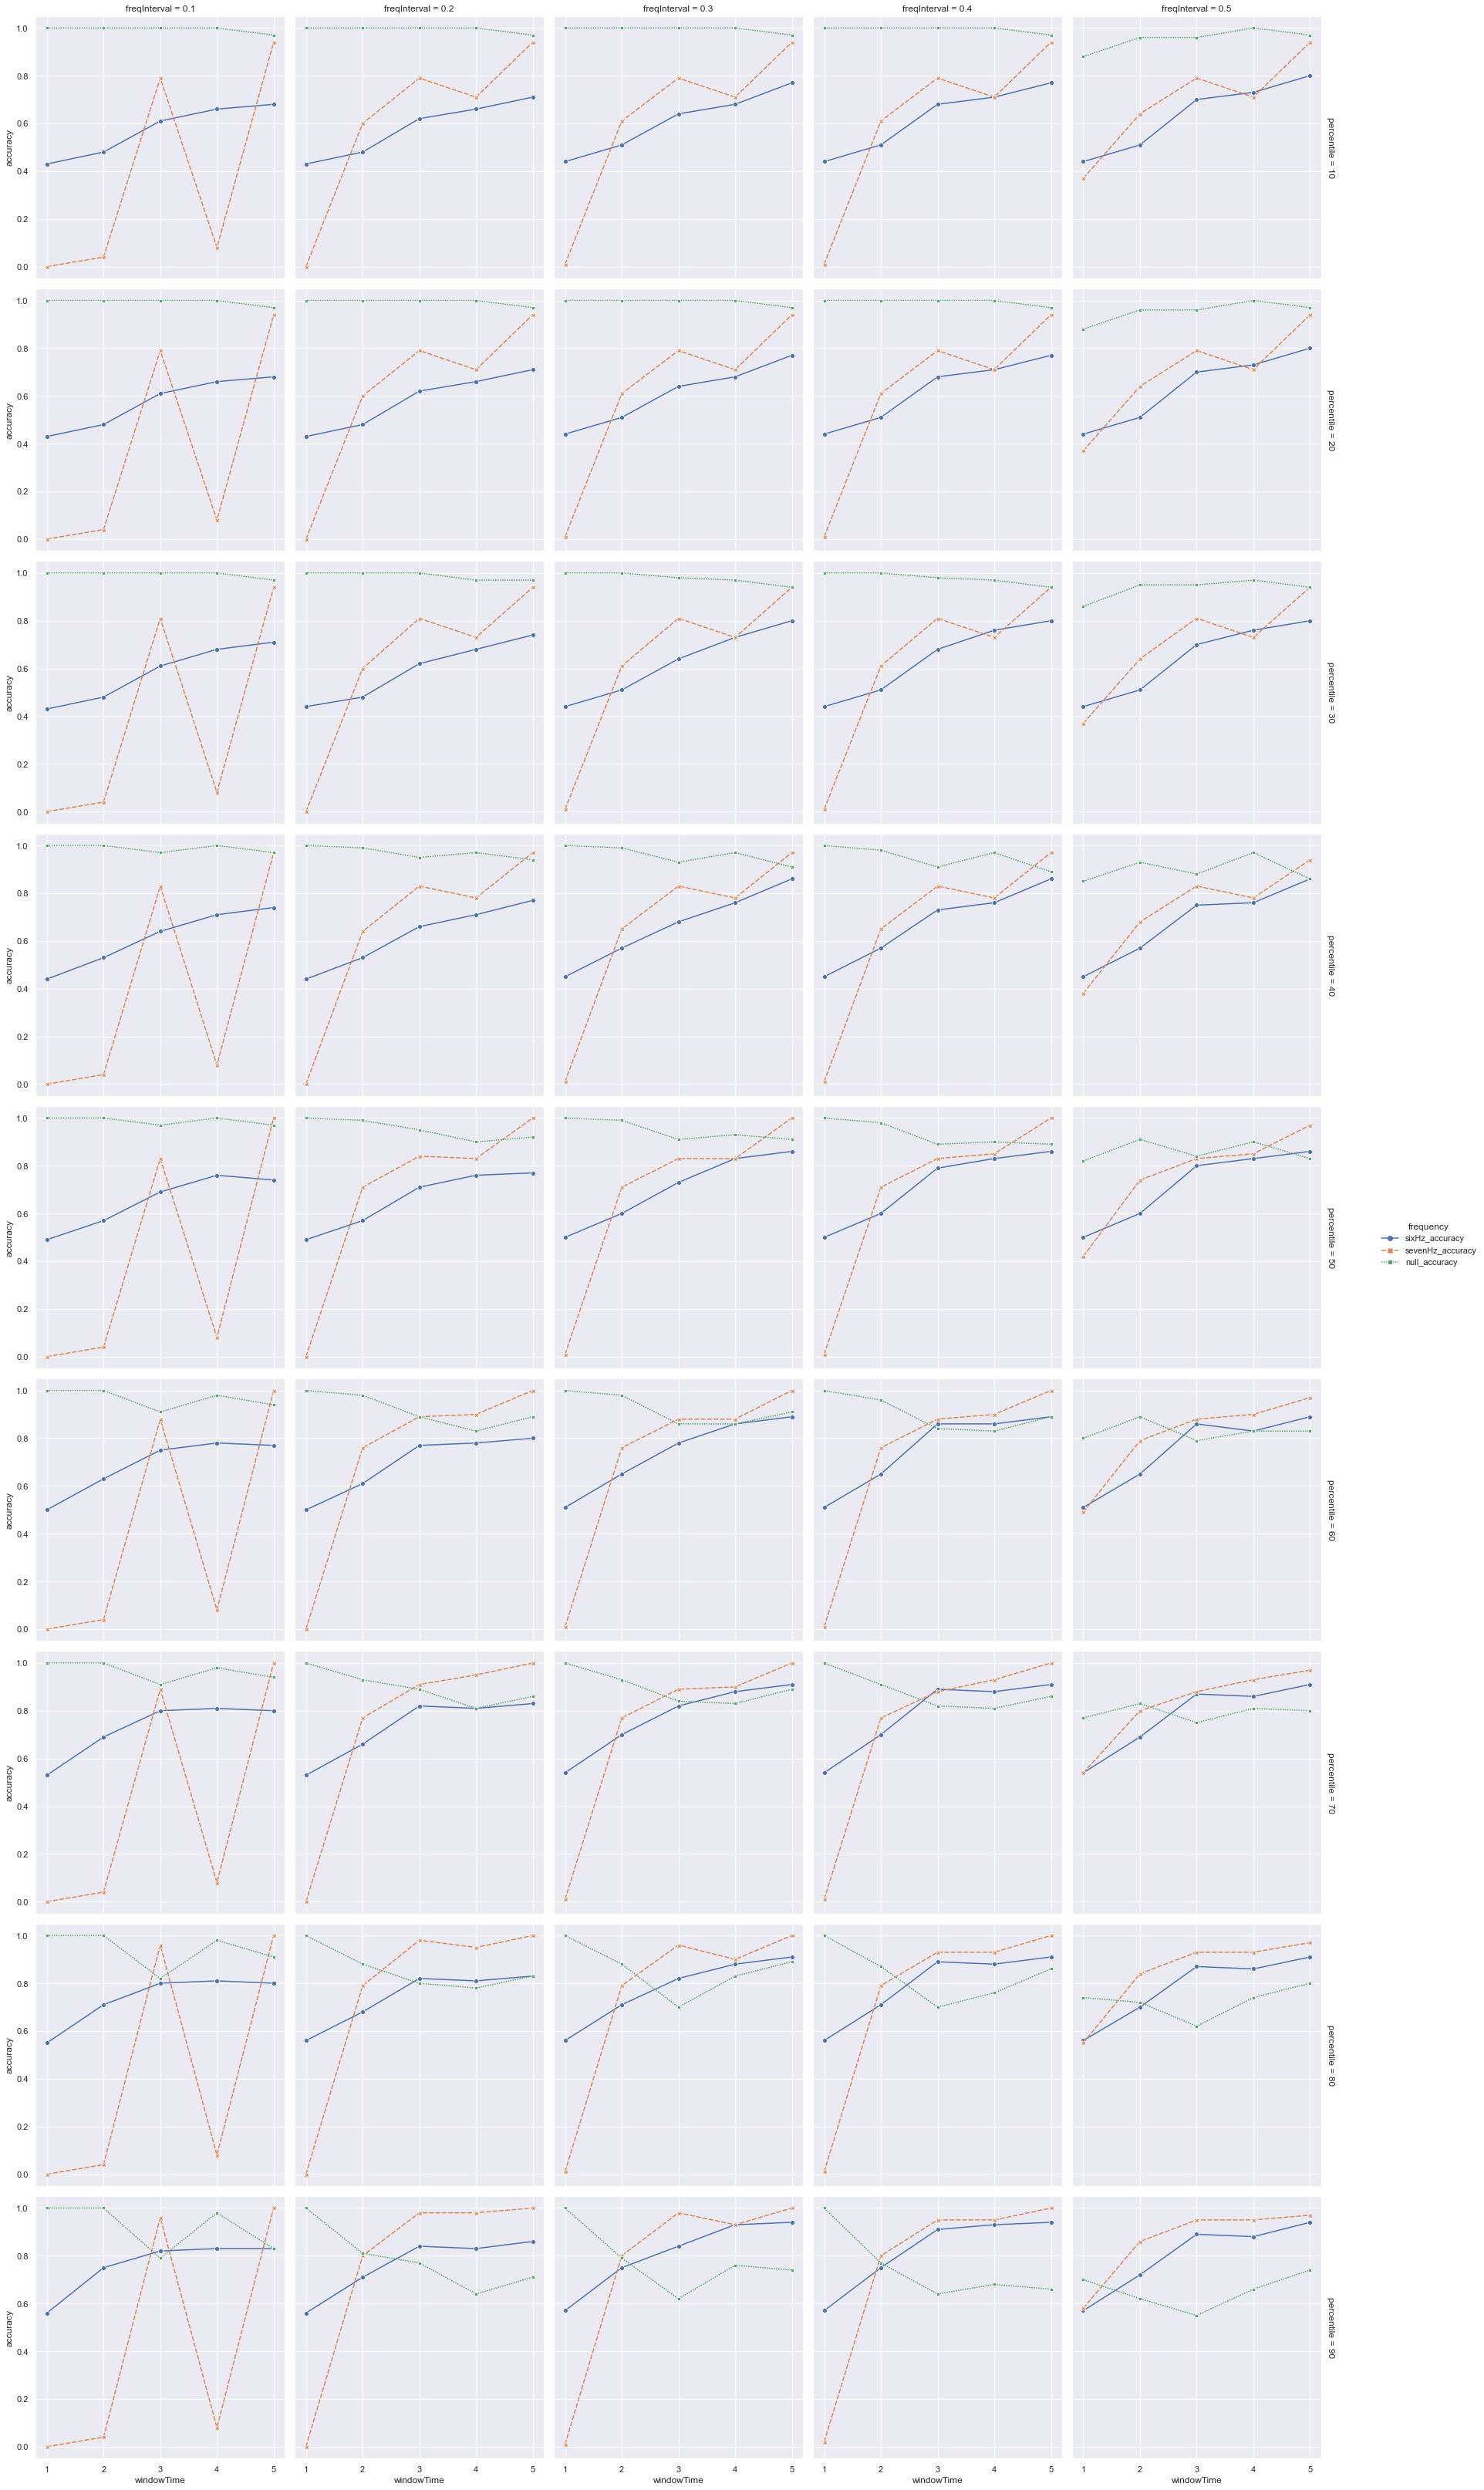

In [6]:
sns.set_theme(style="darkgrid")
sns.relplot(
    data=results, x="windowTime", y="accuracy", col="freqInterval", row="percentile", hue="frequency", style='frequency', kind='line',
    facet_kws={'margin_titles':True, 'subplot_kws': {'xticks': [1,2,3,4,5]}, 'despine':False}, markers=True
)
plt.show()